In [1]:
save_name = 'ResNet34_Oversample_L2_Sum_PosWeight_5_Targets'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
training_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural_Effusion']
out_channels=len(training_columns)
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_GrayScale(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          Linear-125                 [-1, 1000]         513,000
          ResNet-126                 [-1, 1000]               0
          Linear-127                    [-1, 5]           5,005
ResNet_GrayScale-128                    [-1, 5]               0
Total params: 21,796,405
Trainable params: 21,796,405
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.51
Params size (MB): 83.15
Estimated Total Size (MB): 280.05
----------------------------------------------------------------


In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=4,
                                     device=device, 
                                     net=net,
                                     use_positivity_weights=True,
                                     observation_min_count=150,
                                     loss_reduction='sum',
                                     l2_reg=1e-1,
                                     target_columns=training_columns,
                                     augPercent=.4,
                                     save_path= f'notebooks/saved/{save_name}/',
                                     net_name = 'ResNet_GrayScale',
                                     net_kwargs = net_kwargs)

Total Oversampled Rows Added to Train: 1,312

Number of Training Images: 106,609
Number of Validation Images: 26,451

Positive Weights used in BCEWithLogitsLoss:


Atelectasis          5.126250
Cardiomegaly         7.325576
Consolidation       12.959539
Edema                3.234381
Pleural_Effusion     1.919275
dtype: float64

In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 559870.7202         
Time of Completion: 2020-07-30 11:13:48.863052          
Training Duration: 0:18:16.807430          
Validation Duration: 0:02:08.425388

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,17402,0.261062,0.177530,0.211342,0.539252,0.176662
1,Cardiomegaly,12805,0.895197,0.147028,0.252572,0.669686,0.203443
2,Consolidation,7637,0.602069,0.097049,0.167154,0.618919,0.103985
3,Edema,25177,0.131549,0.316121,0.185786,0.613949,0.298462
4,Pleural_Effusion,36519,0.668803,0.485325,0.562480,0.707072,0.529653



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,4121,0.330745,0.161149,0.216710,0.530619,0.161847
1,Cardiomegaly,3019,0.879430,0.151394,0.258319,0.706889,0.232524
2,Consolidation,1571,0.646085,0.088330,0.155413,0.648602,0.095291
3,Edema,6109,0.003274,0.194175,0.006439,0.635137,0.287640
4,Pleural_Effusion,8866,0.633769,0.562125,0.595801,0.764648,0.589274


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 520828.1124         
Time of Completion: 2020-07-30 11:34:16.508743          
Training Duration: 0:18:19.679027          
Validation Duration: 0:02:07.521854

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,17402,0.253017,0.170904,0.204008,0.521590,0.169918
1,Cardiomegaly,12805,0.876298,0.159337,0.269645,0.704917,0.231664
2,Consolidation,7637,0.678670,0.110213,0.189631,0.672384,0.124124
3,Edema,25177,0.138102,0.268101,0.182300,0.604157,0.277300
4,Pleural_Effusion,36519,0.734741,0.544547,0.625506,0.772409,0.610051



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,4121,0.310119,0.156656,0.208160,0.512886,0.155512
1,Cardiomegaly,3019,0.933090,0.138176,0.240708,0.702411,0.216683
2,Consolidation,1571,0.732018,0.088407,0.157761,0.669344,0.102385
3,Edema,6109,0.135701,0.217016,0.166986,0.584319,0.253790
4,Pleural_Effusion,8866,0.745545,0.567967,0.644752,0.798510,0.652102


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [3/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 503911.3141         
Time of Completion: 2020-07-30 11:54:43.164093          
Training Duration: 0:18:19.563377          
Validation Duration: 0:02:06.662124

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,17402,0.246523,0.171820,0.202502,0.522957,0.169599
1,Cardiomegaly,12805,0.867864,0.162787,0.274151,0.702982,0.228152
2,Consolidation,7637,0.697918,0.116860,0.200199,0.697841,0.141133
3,Edema,25177,0.166025,0.248765,0.199142,0.583552,0.264217
4,Pleural_Effusion,36519,0.752293,0.568634,0.647696,0.797986,0.654935



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,4121,0.231012,0.147620,0.180132,0.503016,0.152126
1,Cardiomegaly,3019,0.889367,0.151798,0.259333,0.709142,0.221443
2,Consolidation,1571,0.828771,0.083665,0.151987,0.681556,0.105635
3,Edema,6109,0.309052,0.242674,0.271870,0.564023,0.246179
4,Pleural_Effusion,8866,0.812317,0.546144,0.653154,0.813460,0.676508


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [4/4]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 492667.6076         
Time of Completion: 2020-07-30 12:15:11.826743          
Training Duration: 0:18:20.856481          
Validation Duration: 0:02:07.378285

TRAINING

▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,17402,0.242328,0.172637,0.201630,0.522524,0.171640
1,Cardiomegaly,12805,0.865834,0.165219,0.277487,0.707593,0.228392
2,Consolidation,7637,0.705382,0.123725,0.210524,0.720979,0.186566
3,Edema,25177,0.187354,0.256108,0.216401,0.582845,0.265360
4,Pleural_Effusion,36519,0.760207,0.583419,0.660183,0.810004,0.672999



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,4121,0.202863,0.150306,0.172674,0.508370,0.153481
1,Cardiomegaly,3019,0.875124,0.149266,0.255032,0.686749,0.199851
2,Consolidation,1571,0.813495,0.085778,0.155191,0.678652,0.101998
3,Edema,6109,0.363398,0.255437,0.300000,0.585033,0.255967
4,Pleural_Effusion,8866,0.875592,0.506426,0.641703,0.818579,0.686954


Training Duration: 1:21:48.626358



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.208979
Hamming Loss,0.364463
Combined Recall,0.304625
Combined Precision,0.172284
Combined F1,0.206766


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,17402,0.242328,0.172637,0.201630,0.522524,0.171640
1,Cardiomegaly,12805,0.865834,0.165219,0.277487,0.707593,0.228392
2,Consolidation,7637,0.705382,0.123725,0.210524,0.720979,0.186566
3,Edema,25177,0.187354,0.256108,0.216401,0.582845,0.265360
4,Pleural_Effusion,36519,0.760207,0.583419,0.660183,0.810004,0.672999


***** ROC *****


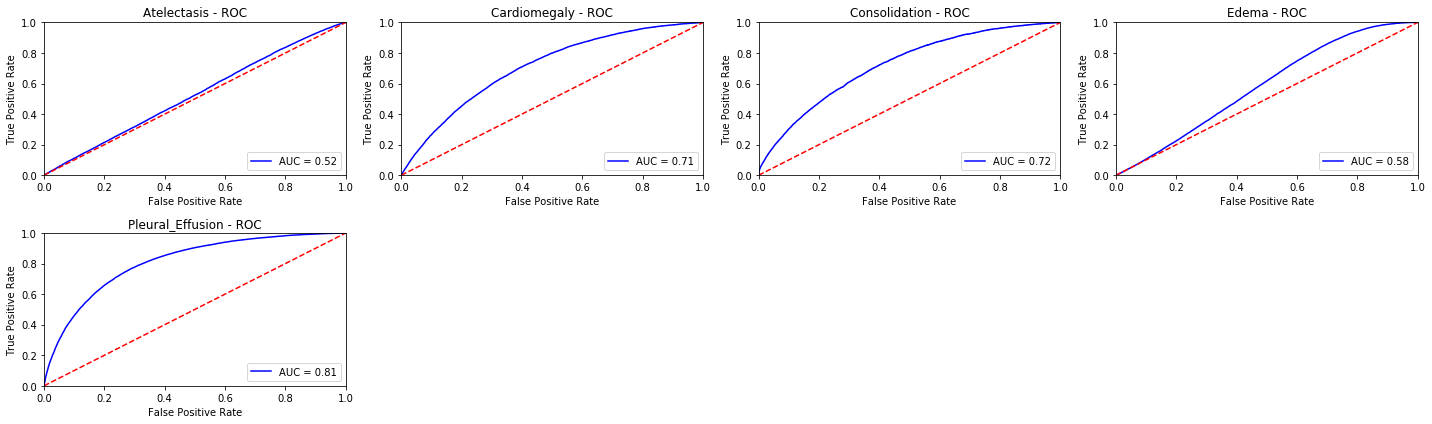

***** Precision / Recall *****


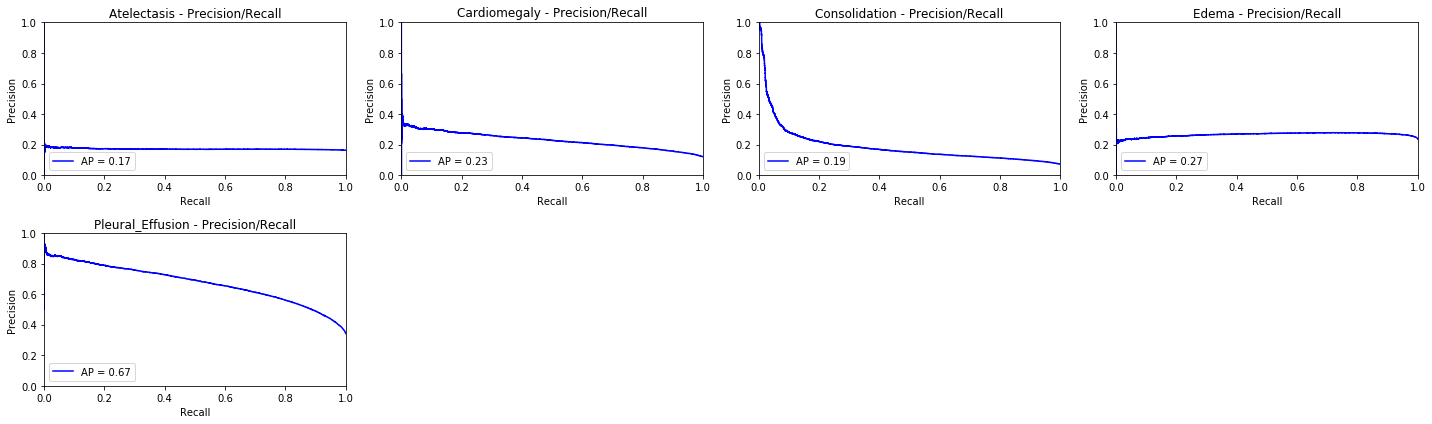


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.169521
Hamming Loss,0.426366
Combined Recall,0.355300
Combined Precision,0.169241
Combined F1,0.217143


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Atelectasis,4121,0.202863,0.150306,0.172674,0.508370,0.153481
1,Cardiomegaly,3019,0.875124,0.149266,0.255032,0.686749,0.199851
2,Consolidation,1571,0.813495,0.085778,0.155191,0.678652,0.101998
3,Edema,6109,0.363398,0.255437,0.300000,0.585033,0.255967
4,Pleural_Effusion,8866,0.875592,0.506426,0.641703,0.818579,0.686954


***** ROC *****


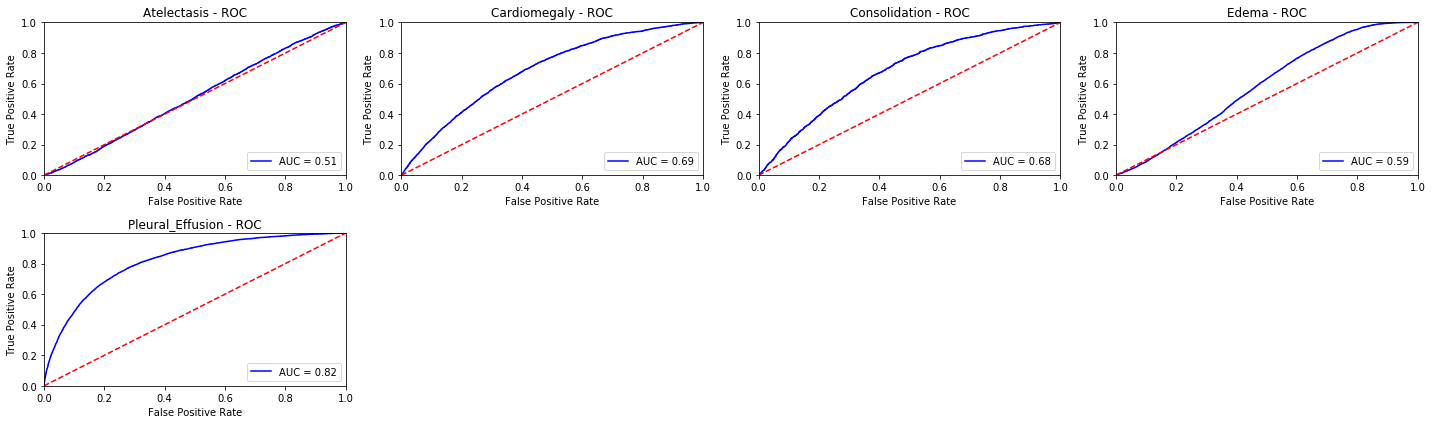

***** Precision / Recall *****


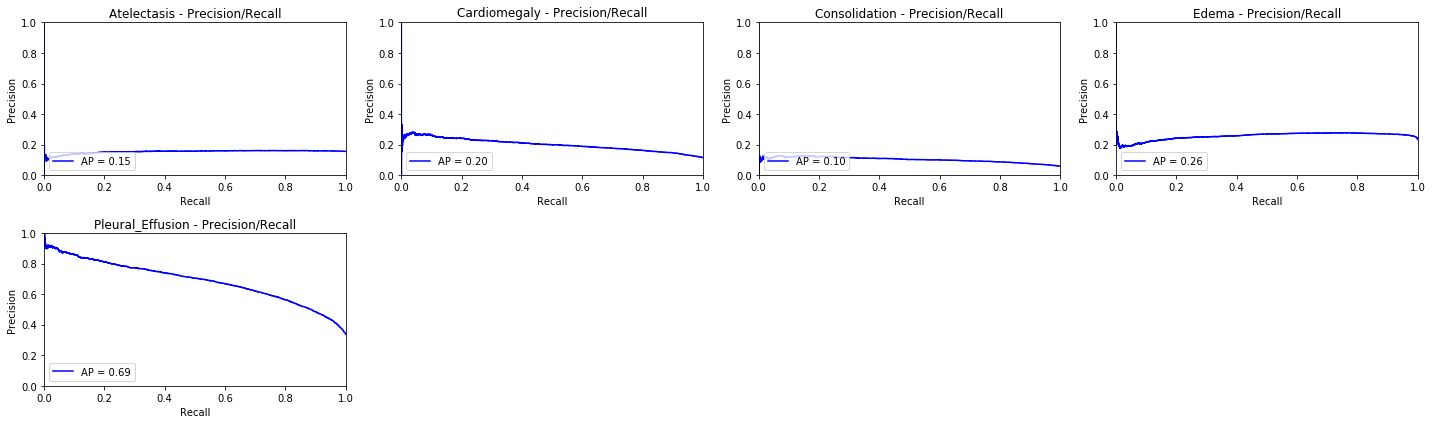

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


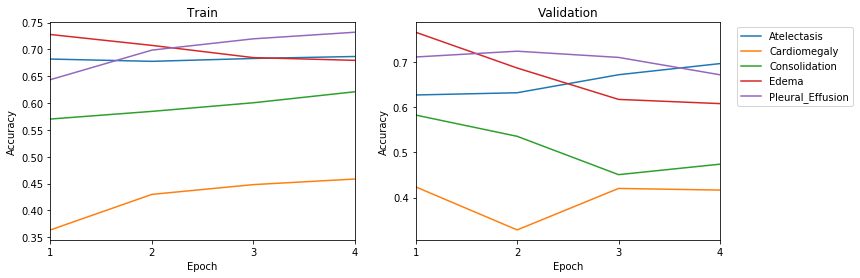


RECALL

▔▔▔


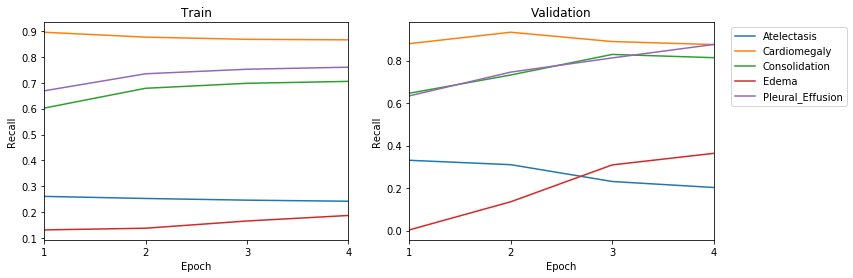


PRECISION

▔▔▔▔▔▔


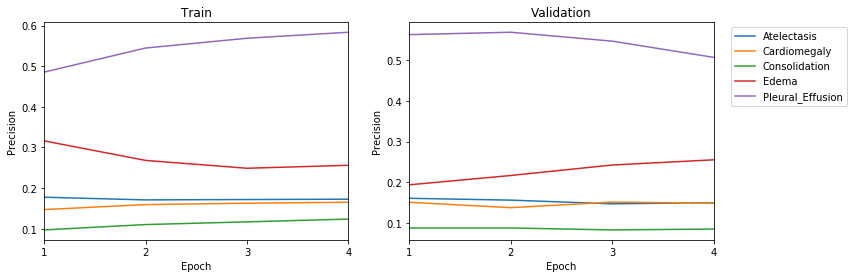


F1

▔


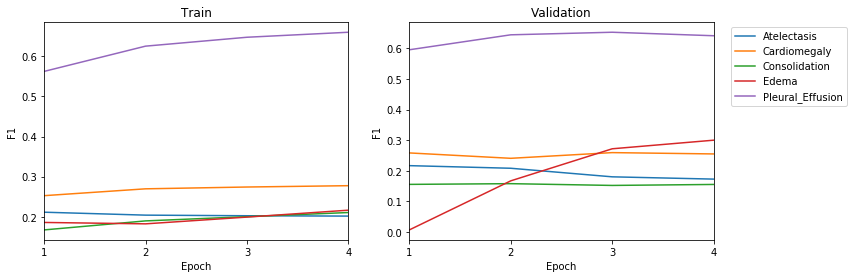


ROC AUC

▔▔▔▔


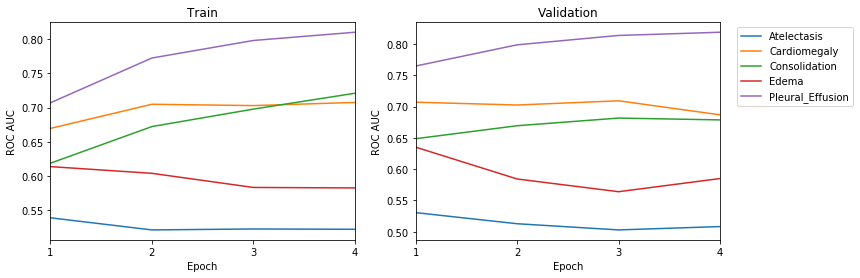


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


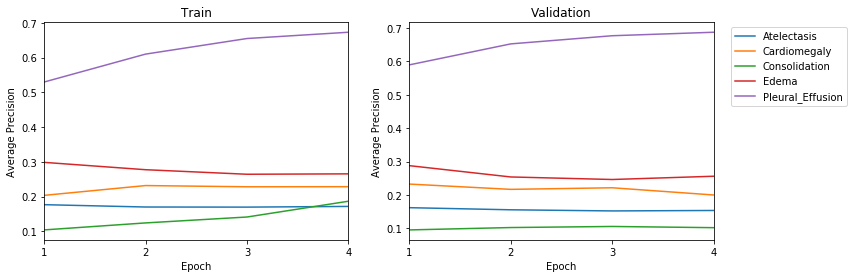

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()